In [23]:
import numpy as np
import pandas as pd
import re

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
from nltk import word_tokenize

In [12]:
df = pd.read_csv('Hotel_Reviews.csv')

In [13]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [14]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [15]:
# Remove the columns
rev = df.drop(columns=['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name',
                       'Reviewer_Nationality', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts',
                       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', 
                       'days_since_review', 'lat', 'lng'], axis=1)
# Print out the first rows of papers
rev.head()

,Negative_Review,Review_Total_Negative_Word_Counts
0,I am so angry that i made this post available...,397
1,No Negative,0
2,Rooms are nice but for elderly a bit difficul...,42
3,My room was dirty and I was afraid to walk ba...,210
4,You When I booked with your company on line y...,140


In [16]:
rev.shape

(515738, 2)

In [17]:
indexNames = rev[rev['Negative_Review'] == 'No Negative' ].index
 
# Delete these row indexes from dataFrame
rev.drop(indexNames , inplace=True)

In [18]:
rev.shape

(387848, 2)

In [19]:
rev['Negative_Review']

0          I am so angry that i made this post available...
2          Rooms are nice but for elderly a bit difficul...
3          My room was dirty and I was afraid to walk ba...
4          You When I booked with your company on line y...
5          Backyard of the hotel is total mess shouldn t...
                                ...                        
515731     No parking Public parking garage is 15 Euro p...
515733     no trolly or staff to help you take the lugga...
515734             The hotel looks like 3 but surely not 4 
515735     The ac was useless It was a hot week in vienn...
515737         I was in 3rd floor It didn t work Free Wife 
Name: Negative_Review, Length: 387848, dtype: object

In [20]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s))


def stopwords(docu):
    # Get all the stop words in the English language
    from nltk.corpus import stopwords
    stopwords_list = stopwords.words('english')

    # It is generally a good idea to also remove punctuation

    # Now we have a list that includes all english stopwords, as well as all punctuation
    #stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    docu = word_tokenize(docu)
    words_s = [word for word in docu if word not in stopwords_list]
    words_s = listToString(words_s)
    return words_s

lemmatizer = WordNetLemmatizer()
# Lemmatize list of words and join

def lemma(doc):
    docs_lemmatized = []
    doc_lemmatized = [lemmatizer.lemmatize(w) for w in doc]
    docs_lemmatized.append(doc_lemmatized)
    return docs_lemmatized


In [21]:
rev['Negative_Review']

0          I am so angry that i made this post available...
2          Rooms are nice but for elderly a bit difficul...
3          My room was dirty and I was afraid to walk ba...
4          You When I booked with your company on line y...
5          Backyard of the hotel is total mess shouldn t...
                                ...                        
515731     No parking Public parking garage is 15 Euro p...
515733     no trolly or staff to help you take the lugga...
515734             The hotel looks like 3 but surely not 4 
515735     The ac was useless It was a hot week in vienn...
515737         I was in 3rd floor It didn t work Free Wife 
Name: Negative_Review, Length: 387848, dtype: object

In [24]:
# Remove punctuation
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: x.lower())
# Remove stopwords
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: stopwords(x))

#rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: lemma(x))

# Print out the first rows of papers
rev['Negative_Review'].head()

0    angry made post available via possible sites u...
2    rooms nice elderly bit difficult rooms two sto...
3    room dirty afraid walk barefoot floor looked c...
4    booked company line showed pictures room thoug...
5         backyard hotel total mess happen hotel stars
Name: Negative_Review, dtype: object

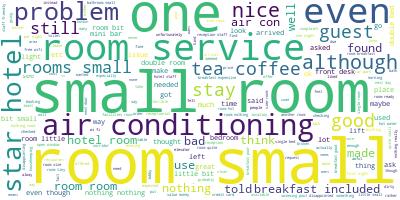

In [25]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed reviews together.
long_string = ','.join(list(rev['Negative_Review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

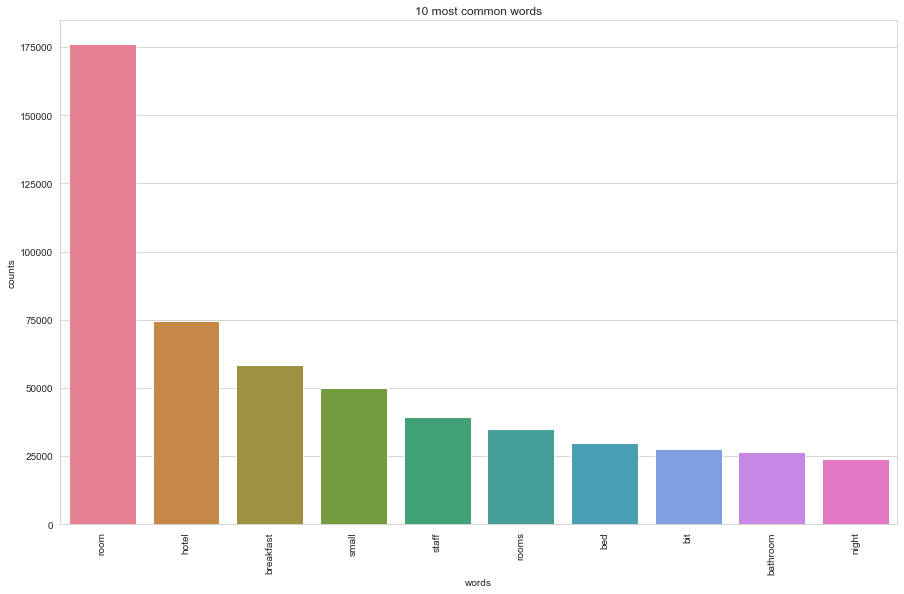

In [26]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(rev['Negative_Review'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [27]:
long_string[0:1000]

'angry made post available via possible sites use planing trips one make mistake booking place made booking via booking com stayed nights hotel 11 17 july upon arrival placed small room 2nd floor hotel turned room booked specially reserved level duplex room would big windows high ceilings room ok mind broken window closed hello rain mini fridge contained sort bio weapon least guessed smell intimately asked change room explaining times booked duplex btw costs simple double got way volume due high ceiling offered room next day check next day 11 clock order get room waned best way begin holiday wait till 13 00 order check new room wonderful waist time room 023 got wanted peaceful internal garden view big window tired waiting room placed belongings rushed city evening turned constant noise room guess made vibrating vent tubes something constant annoying hell stop even making hard fall asleep wife audio recording attach want send via e mail next day technician came able determine cause dist

In [28]:
stri = word_tokenize(long_string)

In [29]:
freqdist = FreqDist(stri)
freqdist.most_common(50)

[(',', 385018),
 ('room', 175883),
 ('hotel', 74665),
 ('breakfast', 58393),
 ('small', 49840),
 ('staff', 39479),
 ('nothing', 38564),
 ('rooms', 34768),
 ('would', 32281),
 ('could', 32076),
 ('bed', 29797),
 ('one', 28088),
 ('bit', 27533),
 ('bathroom', 26561),
 ('night', 24052),
 ('little', 22523),
 ('like', 22426),
 ('shower', 21274),
 ('good', 20793),
 ('us', 20220),
 ('get', 19500),
 ('service', 19307),
 ('bar', 19118),
 ('time', 17469),
 ('stay', 17413),
 ('reception', 16640),
 ('really', 16541),
 ('expensive', 16511),
 ('also', 16467),
 ('poor', 16087),
 ('even', 15417),
 ('check', 15357),
 ('price', 15251),
 ('day', 15143),
 ('floor', 14939),
 ('water', 14274),
 ('noisy', 13923),
 ('air', 13247),
 ('work', 12951),
 ('coffee', 12752),
 ('wifi', 12596),
 ('door', 12527),
 ('hot', 12145),
 ('better', 12061),
 ('quite', 12010),
 ('noise', 11796),
 ('much', 11564),
 ('booking', 11514),
 ('food', 11461),
 ('two', 11184)]

In [30]:
from nltk.corpus import stopwords
import string

# Get all the stop words in the English language
stopwords_list = stopwords.words('english')

# It is generally a good idea to also remove punctuation

# Now we have a list that includes all english stopwords, as well as all punctuation
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


words_stopped = [word for word in stri if word not in stopwords_list]

In [31]:
freqdist = FreqDist(words_stopped)
freqdist.most_common(30)

[('room', 175883),
 ('hotel', 74665),
 ('breakfast', 58393),
 ('small', 49840),
 ('staff', 39479),
 ('nothing', 38564),
 ('rooms', 34768),
 ('would', 32281),
 ('could', 32076),
 ('bed', 29797),
 ('one', 28088),
 ('bit', 27533),
 ('bathroom', 26561),
 ('night', 24052),
 ('little', 22523),
 ('like', 22426),
 ('shower', 21274),
 ('good', 20793),
 ('us', 20220),
 ('get', 19500),
 ('service', 19307),
 ('bar', 19118),
 ('time', 17469),
 ('stay', 17413),
 ('reception', 16640),
 ('really', 16541),
 ('expensive', 16511),
 ('also', 16467),
 ('poor', 16087),
 ('even', 15417)]

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lemmatize list of words and join
words_lemmatized = ' '.join([lemmatizer.lemmatize(w) for w in words_stopped])

In [33]:
words_lemmatized = word_tokenize(words_lemmatized)

In [34]:
freqdist = FreqDist(words_lemmatized)
freqdist.most_common(30)

[('room', 210749),
 ('hotel', 80381),
 ('breakfast', 59205),
 ('small', 49868),
 ('staff', 39966),
 ('nothing', 38720),
 ('bed', 37374),
 ('would', 32290),
 ('could', 32078),
 ('one', 28979),
 ('night', 28367),
 ('bathroom', 28050),
 ('bit', 27755),
 ('time', 23590),
 ('little', 22536),
 ('like', 22524),
 ('shower', 21942),
 ('u', 21203),
 ('good', 20859),
 ('day', 20774),
 ('service', 20595),
 ('get', 20077),
 ('bar', 19946),
 ('price', 18046),
 ('stay', 17738),
 ('reception', 16698),
 ('really', 16543),
 ('floor', 16533),
 ('expensive', 16527),
 ('also', 16467)]

In [35]:
total_word_count = sum(freqdist.values())
top_50_words = freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in top_50_words:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
room 			 0.04661
hotel 			 0.01778
breakfast 			 0.01309
small 			 0.01103
staff 			 0.008839
nothing 			 0.008563
bed 			 0.008265
would 			 0.007141
could 			 0.007094
one 			 0.006409
night 			 0.006274
bathroom 			 0.006203
bit 			 0.006138
time 			 0.005217
little 			 0.004984
like 			 0.004981
shower 			 0.004853
u 			 0.004689
good 			 0.004613
day 			 0.004594
service 			 0.004555
get 			 0.00444
bar 			 0.004411
price 			 0.003991
stay 			 0.003923
reception 			 0.003693
really 			 0.003659
floor 			 0.003656
expensive 			 0.003655
also 			 0.003642
poor 			 0.003561
door 			 0.00344
even 			 0.00341
check 			 0.003409
window 			 0.003383
need 			 0.003374
work 			 0.003193
water 			 0.003166
noisy 			 0.003081
air 			 0.002933
coffee 			 0.002857
wifi 			 0.002789
noise 			 0.002771
restaurant 			 0.002768
area 			 0.002751
hot 			 0.002687
better 			 0.002668
quite 			 0.002657
booking 			 0.002624
food 			 0.002576


In [36]:
import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
rev_finder = BigramCollocationFinder.from_words(words_lemmatized)
rev_scored = rev_finder.score_ngrams(bigram_measures.raw_freq)
rev_scored[:50]

[(('room', 'small'), 0.0029243400275648294),
 (('small', 'room'), 0.0018793799859521986),
 (('room', 'service'), 0.001433972679326201),
 (('air', 'conditioning'), 0.0012216633375382378),
 (('star', 'hotel'), 0.0011586340016949363),
 (('booking', 'com'), 0.0010142194181662488),
 (('tea', 'coffee'), 0.0008863915019647461),
 (('room', 'room'), 0.0008291122107948684),
 (('room', 'bit'), 0.0008246890995076192),
 (('room', 'little'), 0.0007744867863973405),
 (('hotel', 'room'), 0.0007156594062769257),
 (('air', 'con'), 0.0007054862503162525),
 (('breakfast', 'included'), 0.000682264916058194),
 (('double', 'bed'), 0.0006747456268698703),
 (('even', 'though'), 0.0006572743372852359),
 (('front', 'desk'), 0.0006457742479383878),
 (('nothing', 'nothing'), 0.0006400242032649638),
 (('breakfast', 'room'), 0.0006289664250468407),
 (('could', 'better'), 0.0006170240245712679),
 (('little', 'bit'), 0.0006126009132840185),
 (('bit', 'small'), 0.0006101682020760315),
 (('mini', 'bar'), 0.0006055239352

In [37]:
from nltk import ngrams

n = 3
trigrams = list(ngrams(words_lemmatized, n))

#trigrams[0:100]

trigram_measures = nltk.collocations.TrigramAssocMeasures()
rev_trifinder = TrigramCollocationFinder.from_words(words_lemmatized)
rev_triscored = rev_trifinder.score_ngrams(trigram_measures.raw_freq)
rev_triscored[:50]

[(('room', 'bit', 'small'), 0.00034854116943523945),
 (('room', 'little', 'small'), 0.00027268481085891515),
 (('room', 'quite', 'small'), 0.00023398258709548435),
 (('coffee', 'making', 'facility'), 0.0002182805420257496),
 (('making', 'facility', 'room'), 0.00020700160824326406),
 (('tea', 'coffee', 'making'), 0.00019749191897567818),
 (('room', 'small', 'room'), 0.0001957226744607785),
 (('tea', 'coffee', 'facility'), 0.00016033778416278465),
 (('two', 'single', 'bed'), 0.00015790507295479757),
 (('small', 'room', 'small'), 0.00015104925045956126),
 (('breakfast', 'included', 'price'), 0.0001318087163600271),
 (('room', 'room', 'small'), 0.00012672213837969048),
 (('tea', 'coffee', 'room'), 0.00012539520499351572),
 (('four', 'star', 'hotel'), 0.0001231836493498911),
 (('breakfast', 'could', 'better'), 0.00011831822693391694),
 (('air', 'conditioning', 'room'), 0.00011477973790411756),
 (('bed', 'pushed', 'together'), 0.00011389511564666772),
 (('front', 'desk', 'staff'), 0.00011124

In [38]:
n = 4
quadgrams = list(ngrams(words_lemmatized, n))

quadgram_measures = nltk.collocations.QuadgramAssocMeasures()
rev_quadfinder = QuadgramCollocationFinder.from_words(words_lemmatized)
rev_quadscored = rev_quadfinder.score_ngrams(quadgram_measures.raw_freq)
rev_quadscored[:50]

[(('tea', 'coffee', 'making', 'facility'), 0.00018046294051976864),
 (('coffee', 'making', 'facility', 'room'), 0.0001382222277265385),
 (('tea', 'coffee', 'facility', 'room'), 9.576035936894586e-05),
 (('single', 'bed', 'pushed', 'together'), 7.231786954652493e-05),
 (('tea', 'making', 'facility', 'room'), 6.015431350658955e-05),
 (('room', 'little', 'bit', 'small'), 4.511573512994216e-05),
 (('two', 'single', 'bed', 'pushed'), 4.135609053578032e-05),
 (('double', 'bed', 'two', 'single'), 3.472142360490647e-05),
 (('two', 'single', 'pushed', 'together'), 3.472142360490647e-05),
 (('room', 'little', 'small', 'side'), 3.3173334654369235e-05),
 (('room', 'small', 'room', 'small'), 3.05194678820197e-05),
 (('coffee', 'tea', 'making', 'facility'), 2.8750223367120004e-05),
 (('bit', 'far', 'city', 'center'), 2.7423289980945236e-05),
 (('room', 'two', 'single', 'bed'), 2.5875201030408007e-05),
 (('breakfast', 'included', 'room', 'rate'), 2.543288990168308e-05),
 (('wall', 'thin', 'could', 'h

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
rev['Negative_Review'].head()

0    angry made post available via possible sites u...
2    rooms nice elderly bit difficult rooms two sto...
3    room dirty afraid walk barefoot floor looked c...
4    booked company line showed pictures room thoug...
5         backyard hotel total mess happen hotel stars
Name: Negative_Review, dtype: object

In [41]:
# lemmatizer = WordNetLemmatizer()
# docs_lemmatized = []
# # Lemmatize list of words and join
# for doc in docs:
#     doc_lemmatized = ' '.join([lemmatizer.lemmatize(w) for w in doc])
#     docs_lemmatized.append(doc_lemmatized)

In [42]:
docs = rev['Negative_Review']

count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

cv_data = count_vectorizer.fit_transform(docs)
tfidf_data = tfidf_vectorizer.fit_transform(docs)

cv_data = count_vectorizer.fit_transform(docs)
tfidf_data = tfidf_vectorizer.fit_transform(docs)

In [43]:
# def functions for topic modelings
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def display_topics2(model, feature_names, no_top_words=10, topic_names = None):
    for index, topic in enumerate(model.components_):
        if not topic_names or not topic_names[index]:
            print(f"\nTopic {index}")
        else:
            print(f"\nTopic {topic_names[index]}:")
        msg = ", ".join([f'{feature_names[i]} ({topic[i]:6.4f})' 
                             for i in topic.argsort()[:-no_top_words-1:-1]])
        print(msg)

In [44]:
# try using 50 dimensions
n_comp = 7
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [45]:
# topic modeling with lsa and tfidf
display_topics2(lsa_tfidf, tfidf_vectorizer.get_feature_names(),8)


Topic 0
room small (0.9967), small room (0.0397), size room (0.0167), small bathroom (0.0158), room small bed (0.0150), room small bathroom (0.0150), small bed (0.0150), size room small (0.0149)

Topic 1
small room (0.9957), room size (0.0223), rooms small (0.0184), bit small (0.0174), small room small (0.0167), air conditioning (0.0164), room service (0.0159), room bathroom (0.0150)

Topic 2
rooms small (0.9955), small rooms (0.0436), air conditioning (0.0347), breakfast expensive (0.0322), room service (0.0279), value money (0.0139), small price (0.0119), standard rooms (0.0117)

Topic 3
room service (0.8925), breakfast expensive (0.3652), air conditioning (0.1921), service menu (0.0456), room service menu (0.0455), mini bar (0.0436), service food (0.0416), room service food (0.0413)

Topic 4
breakfast expensive (0.9246), room bit (0.0207), bit small (0.0170), price breakfast (0.0161), expensive ate (0.0136), room bit small (0.0133), expensive went (0.0130), breakfast good (0.0122)


In [46]:
from __future__ import print_function

In [47]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [48]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [49]:
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
docs_raw = newsgroups.data
print(len(docs_raw))

11314


In [50]:
#rev['Negative_Review'][2]
data_raw = list(rev['Negative_Review'])
data_raw

['angry made post available via possible sites use planing trips one make mistake booking place made booking via booking com stayed nights hotel 11 17 july upon arrival placed small room 2nd floor hotel turned room booked specially reserved level duplex room would big windows high ceilings room ok mind broken window closed hello rain mini fridge contained sort bio weapon least guessed smell intimately asked change room explaining times booked duplex btw costs simple double got way volume due high ceiling offered room next day check next day 11 clock order get room waned best way begin holiday wait till 13 00 order check new room wonderful waist time room 023 got wanted peaceful internal garden view big window tired waiting room placed belongings rushed city evening turned constant noise room guess made vibrating vent tubes something constant annoying hell stop even making hard fall asleep wife audio recording attach want send via e mail next day technician came able determine cause dis

### Convert to document-term matrix
Next, the raw documents are converted into document-term matrix, possibly as raw counts or in TF-IDF form.

In [51]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(data_raw)
print(dtm_tf.shape)

(387848, 10042)


In [52]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(data_raw)
print(dtm_tfidf.shape)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


(387848, 10042)


### Fit Latent Dirichlet Allocation models
Finally, the LDA models are fitted.

In [53]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

### Visualizing the models with pyLDAvis¶

In [54]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.157895 -0.138211       1        1  14.367127
5     -0.091412 -0.023515       2        1  12.988857
2      0.126421 -0.139311       3        1  12.685093
0     -0.240387 -0.016392       4        1  11.510827
7      0.142200 -0.070965       5        1   9.242317
8     -0.018943 -0.159326       6        1   8.964393
3     -0.113943  0.286776       7        1   8.574547
4      0.132093 -0.027597       8        1   8.150904
1     -0.041496  0.140711       9        1   7.090896
6      0.263362  0.147830      10        1   6.425039, topic_info=     Category           Freq       Term          Total  loglift  logprob
1049  Default   57983.000000  breakfast   57983.000000  30.0000  30.0000
8069  Default   49512.000000      small   49512.000000  29.0000  29.0000
7455  Default  175251.000000       room  175251.000000  28.0000  28.0000
888   Default   27231.000000        bit   27231.000000  27.0000  27.0000
8344  Default   39383.000000      staff   39383.000000  26.0000  26.0000
...       ...            ...        ...            ...      ...      ...
739   Topic10    3451.446197   bathroom   25837.196638   0.7319  -4.2490
7457  Topic10    3711.515723      rooms   34899.970013   0.5039  -4.1764
8919  Topic10    1448.677372      thing    5345.818479   1.4393  -5.1172
6953  Topic10    1721.861331     really   16510.990268   0.4843  -4.9444
8215  Topic10    1290.609951      space    5939.479285   1.2185  -5.2327

[759 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
7         1  0.996608      abrupt
12        1  0.047278  absolutely
12        2  0.905685  absolutely
12        3  0.014810  absolutely
12        4  0.019936  absolutely
...     ...       ...         ...
9980      5  0.014451       worth
9980      7  0.342332       worth
9980      8  0.022480       worth
9980      9  0.014772       worth
9980     10  0.001285       worth

[2500 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 3, 1, 8, 9, 4, 5, 2, 7])

For example, an LDA model might have topics that can be classified as CAT_related and DOG_related. A topic has probabilities of generating various words, such as milk, meow, and kitten, which can be classified and interpreted by the viewer as "CAT_related". Naturally, the word cat itself will have high probability given this topic. The DOG_related topic likewise has probabilities of generating each word: puppy, bark, and bone might have high probability. Words without special relevance, such as "the" (see function word), will have roughly even probability between classes (or can be placed into a separate category). A topic is neither semantically nor epistemologically strongly defined. It is identified on the basis of automatic detection of the likelihood of term co-occurrence. A lexical word may occur in several topics with a different probability, however, with a different typical set of neighboring words in each topic.

Each document is assumed to be characterized by a particular set of topics. This is similar to the standard bag of words model assumption, and makes the individual words exchangeable.

Potential problem classes:

1. Location
2. Value (Price)
3. Cleanliness
4. Ammenities, Facilities
5. Hotel personnal 